Import packages

In [69]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

figsize=(10, 6)
export_dir = './'
data_dir = '../data/FCP_C4_10M_p5/models/'

total_timestep = 11e6
env_prefix = 'C4'

sns.set()
sns.set_context("paper")
sns.set_theme(style="whitegrid")

Read Data

In [70]:
def loop_filename(threadID):
    if os.path.exists(os.path.join(data_dir, f'thread_{threadID}')):
        thread = []
        generation = []
        timesteps = []
        for filename in os.listdir(os.path.join(data_dir, f'thread_{threadID}')):
            if filename.startswith("_model_"):
                stats = filename.split('_')
                thread.append(str(int(stats[2])))
                generation.append(int(stats[3]))
                timesteps.append(int(stats[6]))
        generation.sort()
        timesteps.sort()
        checkpoints = [len(generation)]*len(generation)
        d = {'thread': thread, 'generation': generation, 'timesteps': timesteps, 'checkpoints': checkpoints}
    else:
        print('file not found!')
        return

    df = pd.DataFrame(data=d)
    
    return df

In [71]:
full_data = pd.DataFrame()
for i in range(8):
    data = loop_filename(i)
    full_data = pd.concat([full_data, data], axis=0)

full_data

file not found!
file not found!
file not found!


,thread,generation,timesteps,checkpoints
0,0,1,121856,6
1,0,2,193536,6
2,0,3,254976,6
3,0,4,449536,6
4,0,5,2384896,6
...,...,...,...,...
2,4,3,7453696,7
3,4,4,7709696,7
4,4,5,8416256,7
5,4,6,8426496,7


Plot

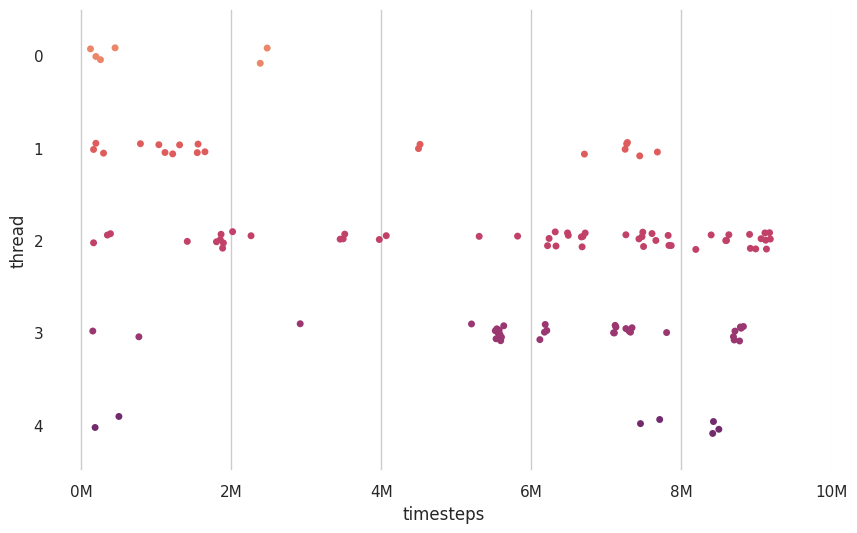

In [72]:
sns.set(rc={'figure.figsize':(18,15), 'axes.grid' : True, 'grid.color': '.8'})
sns.set_style({'axes.facecolor':'white'})
fig, ax = plt.subplots(figsize=figsize)
g = sns.stripplot(data=full_data, x="timesteps", y="thread", hue="thread", palette="flare", legend=False)
plt.xticks(np.arange(0, total_timestep, 2e6))
xlabels = ['{:.0f}'.format(x) + 'M' for x in g.get_xticks()/1e6]
g.set_xticklabels(xlabels)

# save figure
plt.savefig(os.path.join(export_dir, 'checkpoint_swarm_'+env_prefix+'.pdf'), bbox_inches='tight')

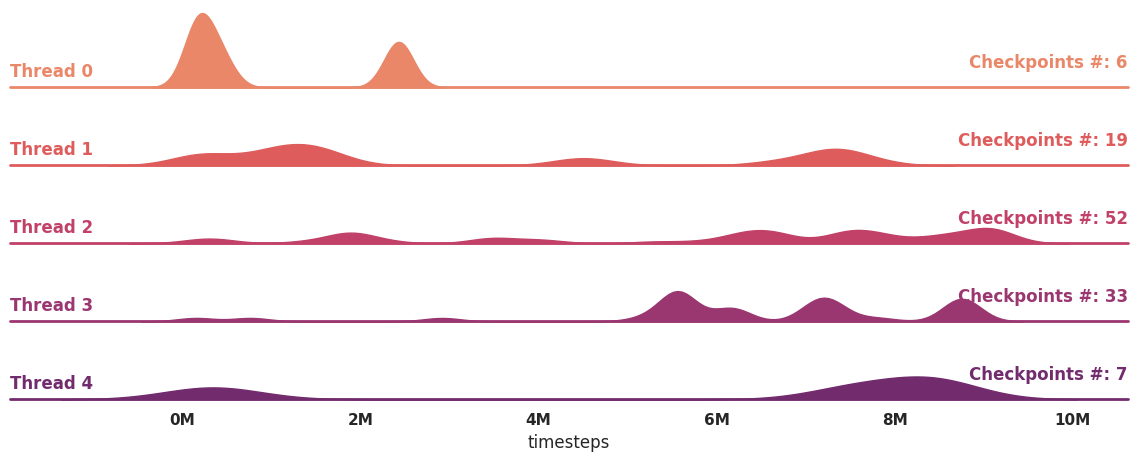

In [73]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
# pal = sns.cubehelix_palette(8, start=-.1, rot=-.1, light=.65)
g = sns.FacetGrid(full_data, row="thread", hue="thread", aspect=12, height=1, palette="flare")

# Draw the densities in a few steps
g.map_dataframe(sns.kdeplot, x="timesteps", bw_adjust=.2, clip_on=False, fill=True, alpha=1, linewidth=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, f'Thread {label}', fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)
def annotate(data, color, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(1, 0.2, f'Checkpoints #: {n}', fontweight="bold", color=color, ha="right", va="bottom", transform=ax.transAxes)

g.map(label, "timesteps")
g.map_dataframe(annotate)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0)

# set xticks
plt.title('Checkpoints Saving Frequency'.title())

for ax in g.axes.flat:
    plt.xticks(np.arange(0, total_timestep, 2e6))
    xlabels = ['{:.0f}'.format(x) + 'M' for x in ax.get_xticks()/1e6]
    ax.set_xticklabels(xlabels, fontweight="bold")

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# save figure
plt.savefig(os.path.join(export_dir, 'checkpoint_dist_'+env_prefix+'.pdf'), bbox_inches='tight')